In [1]:
import cosima_cookbook as cc
import numpy as np
import xarray as xr
import glob, sys
sys.path.append("/g/data/x77/ps7863/python_scripts")
import helper_functions as helper
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

import climtas.nci

from dask.distributed import Client


In [2]:
climtas.nci.GadiClient()

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/45259/status,
Dashboard: /proxy/45259/status,Workers: 48
Total threads: 48,Total memory: 190.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:45133,Workers: 48
Dashboard: /proxy/45259/status,Total threads: 48
Started: Just now,Total memory: 190.00 GiB
Comm: tcp://127.0.0.1:34049,Total threads: 1
Dashboard: /proxy/44455/status,Memory: 3.96 GiB
Nanny: tcp://127.0.0.1:44407,


2025-01-21 15:55:47,962 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:34559' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('getitem-0da0ad4a1f3421b8487347c9ef114246', 55, 2, 0, 1), ('sum-aggregate-33f8cac6621b062c15dc4ea2b3fa00f6', 75, 0, 2), ('getitem-fdc8ad907b994911b94ed46ca0fb9331', 52, 2, 0, 3), ('getitem-fdc8ad907b994911b94ed46ca0fb9331', 52, 2, 0, 0), ('broadcast_to-concatenate-c6bcee993d5664d6eb1565e4121328a9', 50, 4, 0, 2), ('sum-aggregate-33f8cac6621b062c15dc4ea2b3fa00f6', 78, 1, 0), ('nanmax_skip-aggregate-sub-getitem-137b5f2e4760775bceff9dd248572aba', 0, 54, 1, 3), ('sum-aggregate-33f8cac6621b062c15dc4ea2b3fa00f6', 69, 1, 1), ('sum-aggregate-33f8cac6621b062c15dc4ea2b3fa00f6', 89, 0, 1), ('sum-aggregate-33f8cac6621b062c15dc4ea2b3fa00f6', 66, 0, 2), ('getitem-fdc8ad907b994911b94ed46ca0fb9331', 54, 1, 1, 3), ('sum-aggregate-33f8cac6621b062c15dc4ea2b3fa00f6', 85, 1, 3), ('getitem-fdc8ad907b994911b94ed46ca0fb933

In [3]:
session = cc.database.create_session('/g/data/ik11/databases/cosima_master.db')
iaf_cycle3 = '01deg_jra55v140_iaf_cycle3'
expt = '01deg_jra55v140_iaf_cycle3_antarctic_tracers'

In [4]:
first_year = '1958'
last_year = '2018'
start_time=first_year+'-01-01'
end_time=last_year+'-12-31'
time_slice = slice(start_time, end_time)


In [5]:
save_dir = '/g/data/x77/ps7863/data/AABW_variability'


In [6]:
lon_slice = slice(80-360, 190-360)
lat_slice = slice(-82, -55)

In [7]:
tr_adelie = cc.querying.getvar(iaf_cycle3, 'passive_adelie', session,
                               frequency='1 monthly',
                               attrs={'cell_methods': 'time: mean'},
                               start_time=start_time, end_time=end_time,
                               chunks={'time':12, 'xt_ocean':360, 'yt_ocean':360})

tr_adelie = tr_adelie.sel(time=slice(start_time, end_time)).sel(yt_ocean=lat_slice).sel(xt_ocean=lon_slice)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "yt_ocean" starting at index 360. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "yt_ocean" starting at index 360. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "yt_ocean" starting at index 360. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3

In [7]:
tr_ross = cc.querying.getvar(iaf_cycle3, 'passive_ross',
                            session,
                             frequency='1 monthly',
                             attrs={'cell_methods': 'time: mean'},
                             start_time=start_time, end_time=end_time,
                             chunks={'time':12, 'xt_ocean':100, 'yt_ocean':100})

tr_ross = tr_ross.sel(time=slice(start_time, end_time)).sel(yt_ocean=lat_slice).sel(xt_ocean=lon_slice)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "yt_ocean" starting at index 100. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "xt_ocean" starting at index 100. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "yt_ocean" starting at index 100. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3

In [8]:
bot_mask = tr_adelie.where(~np.isfinite(tr_adelie.shift({'st_ocean': -1})))
bot_mask = ~np.isnan(bot_mask)
bot_mask

<xarray.DataArray 'passive_adelie' (time: 732, st_ocean: 75, yt_ocean: 584,
                                    xt_ocean: 1100)> Size: 35GB
dask.array<invert, shape=(732, 75, 584, 1100), dtype=bool, chunksize=(3, 19, 360, 360), chunktype=numpy.ndarray>
Coordinates:
  * xt_ocean  (xt_ocean) float64 9kB -279.9 -279.8 -279.7 ... -170.1 -170.0
  * yt_ocean  (yt_ocean) float64 5kB -81.11 -81.07 -81.02 ... -55.07 -55.01
  * st_ocean  (st_ocean) float64 600B 0.5413 1.681 2.94 ... 5.511e+03 5.709e+03
  * time      (time) datetime64[ns] 6kB 1958-01-16T12:00:00 ... 2018-12-16T12...
Attributes:
    long_name:      passive (adelie)
    units:          dimensionless
    valid_range:    [-10. 100.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    ncfiles:        ['/g/data/ik11/outputs/access-om2-01/01deg_jra55v140_iaf_...
    contact:        Andrew Kiss
    email:          andrew.kiss@anu.edu.au
    created:        2020-11-11
    description:    0.1 degree ACCESS-OM2 global model configuration under in...
    notes:          Run configuration and history: https://github.com/COSIMA/...

In [10]:
bottom_depth = tr_adelie.st_ocean.where(bot_mask).max(dim='st_ocean')
depth_threshold = bottom_depth - 500
mask_bottom_500 = tr_adelie.st_ocean >= depth_threshold
mask_bottom_500 = tr_adelie.where(mask_bottom_500)
mask_bottom_500 = ~np.isnan(mask_bottom_500)


In [11]:
dzt = cc.querying.getvar(iaf_cycle3, 'dzt', session,
                               frequency='1 monthly',
                               start_time=start_time, end_time=end_time,
                               chunks={'time':12, 'xt_ocean':360, 'yt_ocean':360})

dzt = dzt.sel(time=slice(start_time, end_time)).sel(yt_ocean=lat_slice).sel(xt_ocean=lon_slice)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "yt_ocean" starting at index 360. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "yt_ocean" starting at index 360. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "yt_ocean" starting at index 360. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3

In [12]:
dzt_bottom_500 = dzt.where(mask_bottom_500) 

In [13]:
adelie_bottom_500 = tr_adelie.where(mask_bottom_500)
# ross_bottom_500 = tr_ross.where(mask_bottom_500)

In [15]:
adelie_bottom_500_mean = (adelie_bottom_500 * dzt_bottom_500).sum('st_ocean') / dzt_bottom_500.sum('st_ocean')
# ross_bottom_500_mean = (ross_bottom_500 * dzt_bottom_500).sum('st_ocean') / dzt_bottom_500.sum('st_ocean')

In [21]:
ross_bottom_500_mean=ross_bottom_500_mean.to_dataset(name='RSBW tracer').assign_attrs(Description='RSBW tracer averaged over bottom 500-m layer')

In [26]:
ross_bottom_500_mean.to_netcdf(f'{save_dir}/RSBW_tracer_bottom_500_{first_year}-{last_year}.nc')

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
 

In [15]:
adelie_climatology = adelie_bottom_500_mean.groupby('time.month').mean('time')
adelie_climatology

<xarray.DataArray (month: 12, yt_ocean: 584, xt_ocean: 1100)> Size: 31MB
dask.array<transpose, shape=(12, 584, 1100), dtype=float32, chunksize=(3, 100, 100), chunktype=numpy.ndarray>
Coordinates:
  * xt_ocean  (xt_ocean) float64 9kB -279.9 -279.8 -279.7 ... -170.1 -170.0
  * yt_ocean  (yt_ocean) float64 5kB -81.11 -81.07 -81.02 ... -55.07 -55.01
  * month     (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

In [16]:
adelie_bottom_500_mean=adelie_bottom_500_mean.to_dataset(name='ALBW_tracer').assign_attrs(Description='ALBW tracer averaged over bottom 500-m layer')
adelie_bottom_500_mean.to_netcdf(f'{save_dir}/ALBW_tracer_bottom_500_{first_year}-{last_year}.nc')


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
 

In [32]:
peak_month = adelie_climatology.argmax('month')+1

In [14]:
bottom_adelie = tr_adelie.where(bot_mask).sum(dim='st_ocean')
bottom_ross = tr_ross.where(bot_mask).sum(dim='st_ocean')

In [31]:
adelie_bottom_mean = bottom_adelie.groupby('time.month').mean('time')
ross_bottom_mean = bottom_ross.groupby('time.month').mean('time')

In [33]:
peak_months_adelie = adelie_bottom_mean.argmax('month') + 1
peak_months_ross = ross_bottom_mean.argmax('month') + 1

In [36]:
peak_months_ross.assign_attrs(description='Peak month of annual RSBW tracer concentration in the bottom cell')
peak_months_ross.to_netcdf('/g/data/x77/ps7863/data/AABW_variability/RSBW_concentration_peak_month_1958-2018_2.nc')

In [37]:
peak_months_adelie.assign_attrs(description='Peak month of annual ALBW tracer concentration in the bottom cell')
peak_months_adelie.to_netcdf('/g/data/x77/ps7863/data/AABW_variability/ALBW_concentration_peak_month_1958-2018_2.nc')

## T,S, $\sigma_2$

In [8]:
temp = cc.querying.getvar(iaf_cycle3, 'pot_temp',
                            session,
                             frequency='1 monthly',
                             attrs={'cell_methods': 'time: mean'},
                             start_time=start_time, end_time=end_time,
                             chunks={'time':12, 'xt_ocean':360, 'yt_ocean':360})

temp = temp.sel(time=slice(start_time, end_time)).sel(yt_ocean=lat_slice).sel(xt_ocean=lon_slice)

salt = cc.querying.getvar(iaf_cycle3, 'salt',
                            session,
                             frequency='1 monthly',
                             attrs={'cell_methods': 'time: mean'},
                             start_time=start_time, end_time=end_time,
                             chunks={'time':12, 'xt_ocean':360, 'yt_ocean':360})

salt = salt.sel(time=slice(start_time, end_time)).sel(yt_ocean=lat_slice).sel(xt_ocean=lon_slice)

sigma = cc.querying.getvar(iaf_cycle3, 'pot_rho_2',
                            session,
                             frequency='1 monthly',
                             attrs={'cell_methods': 'time: mean'},
                             start_time=start_time, end_time=end_time,
                             chunks={'time':12, 'xt_ocean':360, 'yt_ocean':360})

sigma = sigma.sel(time=slice(start_time, end_time)).sel(yt_ocean=lat_slice).sel(xt_ocean=lon_slice)

 

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "yt_ocean" starting at index 360. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "yt_ocean" starting at index 360. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "yt_ocean" starting at index 360. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3

In [9]:
age = cc.querying.getvar(iaf_cycle3, 'age_global',
                            session,
                             frequency='1 monthly',
                             attrs={'cell_methods': 'time: mean'},
                             start_time=start_time, end_time=end_time,
                             chunks={'time':12, 'xt_ocean':360, 'yt_ocean':360})

age = age.sel(time=slice(start_time, end_time)).sel(yt_ocean=lat_slice).sel(xt_ocean=lon_slice)

 

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "yt_ocean" starting at index 360. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "yt_ocean" starting at index 360. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "yt_ocean" starting at index 360. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3

In [10]:
bot_mask = age.where(~np.isfinite(age.shift({'st_ocean': -1})))
bot_mask = ~np.isnan(bot_mask)
bot_mask

<xarray.DataArray 'age_global' (time: 732, st_ocean: 75, yt_ocean: 510,
                                xt_ocean: 1100)> Size: 31GB
dask.array<invert, shape=(732, 75, 510, 1100), dtype=bool, chunksize=(3, 19, 286, 360), chunktype=numpy.ndarray>
Coordinates:
  * xt_ocean  (xt_ocean) float64 9kB -279.9 -279.8 -279.7 ... -170.1 -170.0
  * yt_ocean  (yt_ocean) float64 4kB -77.98 -77.94 -77.9 ... -55.07 -55.01
  * st_ocean  (st_ocean) float64 600B 0.5413 1.681 2.94 ... 5.511e+03 5.709e+03
  * time      (time) datetime64[ns] 6kB 1958-01-16T12:00:00 ... 2018-12-16T12...
Attributes:
    long_name:      Age (global)
    units:          yr
    valid_range:    [0.e+00 1.e+20]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_water_age_since_surface_contact
    ncfiles:        ['/g/data/cj50/access-om2/raw-output/access-om2-01/01deg_...
    contact:        Andrew Kiss
    email:          andrew.kiss@anu.edu.au
    created:        2020-11-11
    description:    0.1 degree ACCESS-OM2 global model configuration under in...
    notes:          Run configuration and history: https://github.com/COSIMA/...

In [14]:
bottom_depth = age.st_ocean.where(bot_mask).max(dim='st_ocean')
depth_threshold = bottom_depth - 500
mask = age.st_ocean >= depth_threshold
mask = age.where(mask)
mask = ~np.isnan(mask)


In [10]:
fpath = '/g/data/x77/ps7863/data/AABW_variability/mask_bottom_500m.nc'
mask = xr.open_dataset(fpath)
mask = mask['Mask for bottom 500 m']

In [15]:
temp = temp - 273.15

In [16]:
temp_masked = temp.where(mask)
salt_masked = salt.where(mask)
sigma_masked = sigma.where(mask)
age_masked = age.where(mask)
dzt_masked = dzt.where(mask)

In [17]:
temp_masked

<xarray.DataArray 'pot_temp' (time: 732, st_ocean: 75, yt_ocean: 510,
                              xt_ocean: 1100)> Size: 123GB
dask.array<where, shape=(732, 75, 510, 1100), dtype=float32, chunksize=(3, 19, 286, 360), chunktype=numpy.ndarray>
Coordinates:
  * xt_ocean  (xt_ocean) float64 9kB -279.9 -279.8 -279.7 ... -170.1 -170.0
  * yt_ocean  (yt_ocean) float64 4kB -77.98 -77.94 -77.9 ... -55.07 -55.01
  * st_ocean  (st_ocean) float64 600B 0.5413 1.681 2.94 ... 5.511e+03 5.709e+03
  * time      (time) datetime64[ns] 6kB 1958-01-16T12:00:00 ... 2018-12-16T12...

In [18]:
temp_bottom = (temp_masked * dzt_masked).sum('st_ocean') / dzt_masked.sum('st_ocean')
salt_bottom = (salt_masked * dzt_masked).sum('st_ocean') / dzt_masked.sum('st_ocean')
sigma_bottom = (sigma_masked * dzt_masked).sum('st_ocean') / dzt_masked.sum('st_ocean')
age_bottom = (age_masked * dzt_masked).sum('st_ocean') / dzt_masked.sum('st_ocean')

In [ ]:
# Apply the function with computation for each group
adelie_peak_months = bottom_adelie.groupby('time.year').map(max_month_for_year)
# adelie_peak_months_mean = adelie_peak_months.mean('year')

In [ ]:
adelie_peak_months=adelie_peak_months.assign_attrs(description='Peak month of annual ALBW tracer concentration in the bottom cell')
adelie_peak_months.to_netcdf('/g/data/x77/ps7863/data/AABW_variability/ALBW_concentration_peak_month_1958-2018.nc')

In [46]:
adelie_peak_months.to_netcdf('/g/data/x77/ps7863/data/AABW_variability/ALBW_concentration_peak_month_1958-1968.nc')

In [32]:
ross_peak_months = bottom_ross.groupby('time.year').map(max_month_for_year)
# ross_peak_months_mean = ross_peak_months.mean('year')

In [33]:
ross_peak_months = ross_peak_months.assign_attrs(description='Peak month of annual RSBW tracer concentration in the bottom cell')
ross_peak_months.to_netcdf('/g/data/x77/ps7863/data/AABW_variability/RSBW_concentration_peak_month_1958-2018.nc')

In [21]:
temp_bottom.assign_attrs(Name='pot_temp', Description='Potential temperature averaged over bottom 500 m ', units='deg C')
salt_bottom.assign_attrs(name='salt', Description='Practical salinity averaged over bottom 500 m', units='psu')
age_bottom.assign_attrs(name='age', Description='Age averaged over bottom 500 m', units='yrs')
sigma_bottom.assign_attrs(name='sigma2', Description='Potential density (2000 dbar) averaged over bottom 500 m', units='kg m$^{-3}$')


<xarray.DataArray (time: 732, yt_ocean: 510, xt_ocean: 1100)> Size: 2GB
dask.array<truediv, shape=(732, 510, 1100), dtype=float32, chunksize=(3, 100, 100), chunktype=numpy.ndarray>
Coordinates:
  * xt_ocean  (xt_ocean) float64 9kB -279.9 -279.8 -279.7 ... -170.1 -170.0
  * yt_ocean  (yt_ocean) float64 4kB -77.98 -77.94 -77.9 ... -55.07 -55.01
  * time      (time) datetime64[ns] 6kB 1958-01-16T12:00:00 ... 2018-12-16T12...
Attributes:
    name:         sigma2
    Description:  Potential density (2000 dbar) averaged over bottom 500 m
    units:        kg m$^{-3}$

In [24]:
temp_bottom.to_netcdf(f'{save_dir}/temperature_in_the_bottom_500m_{first_year}-{last_year}.nc')
# salt_bottom.to_netcdf(f'{save_dir}/salinity_in_the_bottom_500m_{first_year}-{last_year}.nc')
# age_bottom.to_netcdf(f'{save_dir}/age_in_the_bottom_500m_{first_year}-{last_year}.nc')
# sigma_bottom.to_netcdf(f'{save_dir}/sigma2_in_the_bottom_500m_{first_year}-{last_year}.nc')



/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
 

In [12]:
tr_weddell= cc.querying.getvar(iaf_cycle3, 'passive_weddell', session,
                               frequency='1 monthly',
                               attrs={'cell_methods': 'time: mean'},
                               start_time=start_time, end_time=end_time,
                               chunks={'time':12, 'xt_ocean':360, 'yt_ocean':360})



/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "yt_ocean" starting at index 360. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "yt_ocean" starting at index 360. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "yt_ocean" starting at index 360. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3

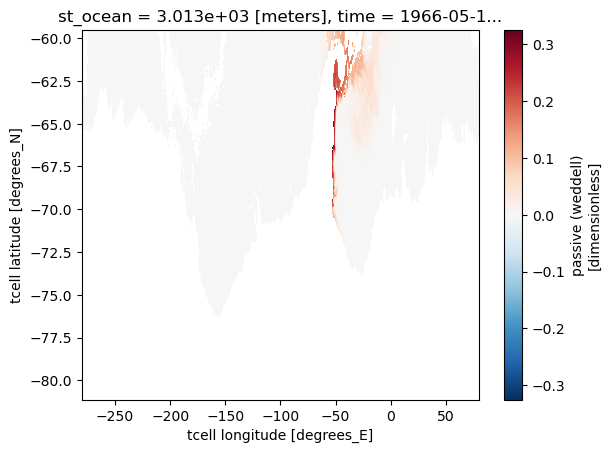

In [11]:
tr_weddell.isel(st_ocean=60, time=100, yt_ocean=slice(0,500)).plot()

In [9]:
lon_slice = slice(-70, 80)
lat_slice = slice(-82, -55)


In [10]:
tr_weddell = tr_weddell.sel(time=slice(start_time, end_time)).sel(yt_ocean=lat_slice).sel(xt_ocean=lon_slice)

In [16]:
bot_mask = tr_weddell.where(~np.isfinite(tr_weddell.shift({'st_ocean': -1})))
bot_mask = ~np.isnan(bot_mask)
bot_mask

<xarray.DataArray 'passive_weddell' (time: 732, st_ocean: 75, yt_ocean: 2700,
                                     xt_ocean: 3600)> Size: 534GB
dask.array<invert, shape=(732, 75, 2700, 3600), dtype=bool, chunksize=(3, 19, 360, 360), chunktype=numpy.ndarray>
Coordinates:
  * xt_ocean  (xt_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean  (yt_ocean) float64 22kB -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
  * st_ocean  (st_ocean) float64 600B 0.5413 1.681 2.94 ... 5.511e+03 5.709e+03
  * time      (time) datetime64[ns] 6kB 1958-01-16T12:00:00 ... 2018-12-16T12...
Attributes:
    long_name:      passive (weddell)
    units:          dimensionless
    valid_range:    [-10. 100.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    ncfiles:        ['/g/data/ik11/outputs/access-om2-01/01deg_jra55v140_iaf_...
    contact:        Andrew Kiss
    email:          andrew.kiss@anu.edu.au
    created:        2020-11-11
    description:    0.1 degree ACCESS-OM2 global model configuration under in...
    notes:          Run configuration and history: https://github.com/COSIMA/...

In [17]:
bottom_depth = tr_weddell.st_ocean.where(bot_mask).max(dim='st_ocean')
depth_threshold = bottom_depth - 500
mask_bottom_500 = tr_weddell.st_ocean >= depth_threshold
mask_bottom_500 = tr_weddell.where(mask_bottom_500)
mask_bottom_500 = ~np.isnan(mask_bottom_500)


In [18]:
dzt_bottom_500 = dzt.where(mask_bottom_500) 

In [19]:
weddell_bottom_500 = tr_weddell.where(mask_bottom_500)

In [20]:
weddell_bottom_500_mean = (weddell_bottom_500 * dzt_bottom_500).sum('st_ocean') / dzt_bottom_500.sum('st_ocean')

In [21]:
weddell_bottom_500_mean = weddell_bottom_500_mean.to_dataset(name='WSBW tracer').assign_attrs(Description='WSBW tracer averaged over bottom 500-m layer')

In [ ]:
weddell_bottom_500_mean.to_netcdf(f'{save_dir}/WSBW_tracer_bottom_500_{first_year}-{last_year}.nc')

In [11]:
tr_weddell

<xarray.DataArray 'passive_weddell' (time: 732, st_ocean: 75, yt_ocean: 584,
                                     xt_ocean: 1500)> Size: 192GB
dask.array<getitem, shape=(732, 75, 584, 1500), dtype=float32, chunksize=(3, 19, 360, 360), chunktype=numpy.ndarray>
Coordinates:
  * xt_ocean  (xt_ocean) float64 12kB -69.95 -69.85 -69.75 ... 79.75 79.85 79.95
  * yt_ocean  (yt_ocean) float64 5kB -81.11 -81.07 -81.02 ... -55.07 -55.01
  * st_ocean  (st_ocean) float64 600B 0.5413 1.681 2.94 ... 5.511e+03 5.709e+03
  * time      (time) datetime64[ns] 6kB 1958-01-16T12:00:00 ... 2018-12-16T12...
Attributes:
    long_name:      passive (weddell)
    units:          dimensionless
    valid_range:    [-10. 100.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    ncfiles:        ['/g/data/ik11/outputs/access-om2-01/01deg_jra55v140_iaf_...
    contact:        Andrew Kiss
    email:          andrew.kiss@anu.edu.au
    created:        2020-11-11
    description:    0.1 degree ACCESS-OM2 global model configuration under in...
    notes:          Run configuration and history: https://github.com/COSIMA/...

In [13]:
tr_prydz= cc.querying.getvar(iaf_cycle3, 'passive_prydz', session,
                               frequency='1 monthly',
                               attrs={'cell_methods': 'time: mean'},
                               start_time=start_time, end_time=end_time,
                               chunks={'time':12, 'xt_ocean':360, 'yt_ocean':360})



/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "yt_ocean" starting at index 360. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "yt_ocean" starting at index 360. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/dataset.py:274: UserWarning: The specified chunks separate the stored chunks along dimension "yt_ocean" starting at index 360. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3

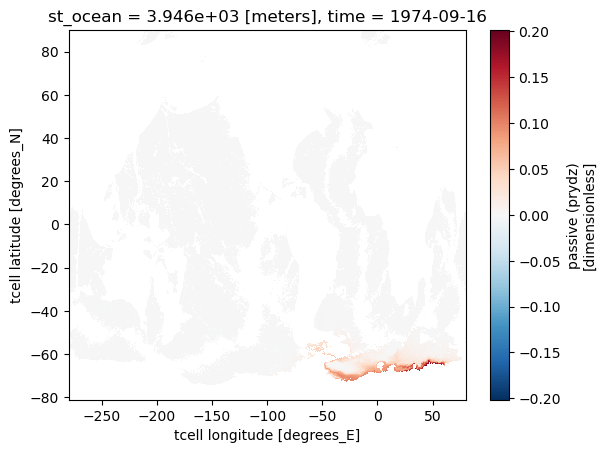

In [14]:
tr_prydz.isel(time=200, st_ocean=65).plot()

In [23]:
tr_prydz = tr_prydz.sel(time=slice(start_time, end_time)).sel(yt_ocean=lat_slice).sel(xt_ocean=lon_slice)

In [18]:
dzt_bottom_500 = dzt.where(mask_bottom_500) 

In [24]:
prydz_bottom_500 = tr_prydz.where(mask_bottom_500)

In [25]:
prydz_bottom_500_mean = (prydz_bottom_500 * dzt_bottom_500).sum('st_ocean') / dzt_bottom_500.sum('st_ocean')

In [26]:
prydz_bottom_500_mean = prydz_bottom_500_mean.to_dataset(name='PBBW tracer').assign_attrs(Description='Prydz Bay bottom water tracer averaged over bottom 500-m layer')

In [ ]:
prydz_bottom_500_mean.to_netcdf(f'{save_dir}/PBBW_tracer_bottom_500_{first_year}-{last_year}.nc')

2025-01-08 15:26:29,300 - distributed.worker - ERROR - failed during get data with tcp://127.0.0.1:33563 -> tcp://127.0.0.1:36605
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/tornado/iostream.py", line 861, in _read_to_buffer
    bytes_read = self.read_from_fd(buf)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/tornado/iostream.py", line 1116, in read_from_fd
    return self.socket.recv_into(buf, len(buf))
TimeoutError: [Errno 110] Connection timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/worker.py", line 1783, in get_data
    response = await comm.read(deserializers=serializers)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/comm/